1.Data collection.

2.Data Analysis.

3.Data Wrangling.

4.Train and Test.

5.Accuracy check.



In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
datas=pd.read_csv("diabetes.csv")
datas.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
datas.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [90]:
datas.shape

(768, 9)

In [91]:
datas.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


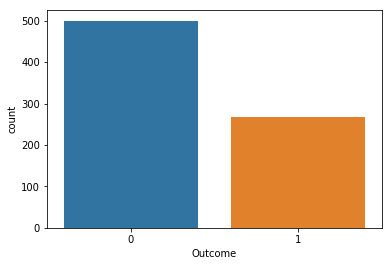

In [92]:
#check the relationship btn variables(atrributes), how affecting one another
#you can use correlation graph or distribution graph
sns.countplot(x="Outcome", data=datas)

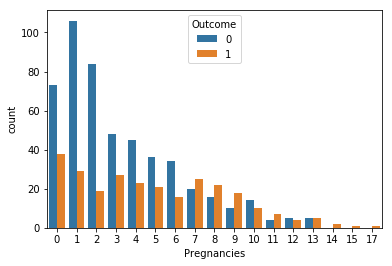

In [101]:
sns.countplot(x="Pregnancies", hue="Outcome", data=datas, )

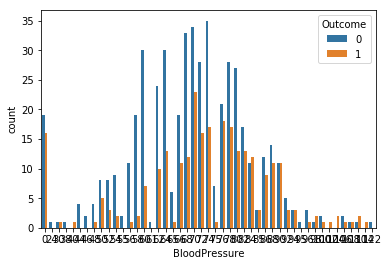

In [103]:
sns.countplot(x="BloodPressure", hue="Outcome", data=datas, )

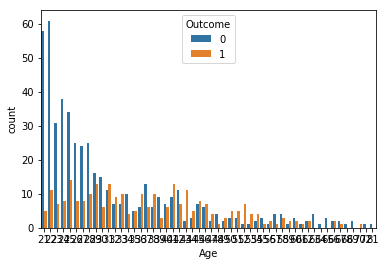

In [104]:
sns.countplot(x="Age", hue="Outcome", data=datas, )

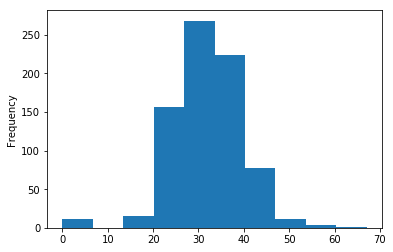

In [96]:
datas["BMI"].plot.hist()

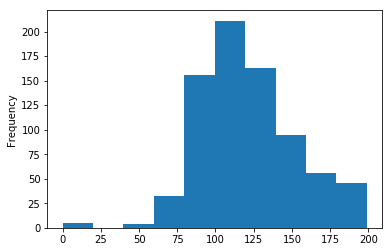

In [97]:
datas["Glucose"].plot.hist()

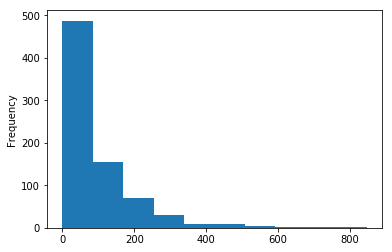

In [98]:
datas["Insulin"].plot.hist()

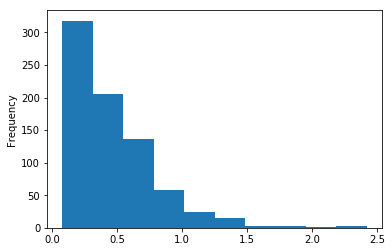

In [99]:
datas['DiabetesPedigreeFunction'].plot.hist()

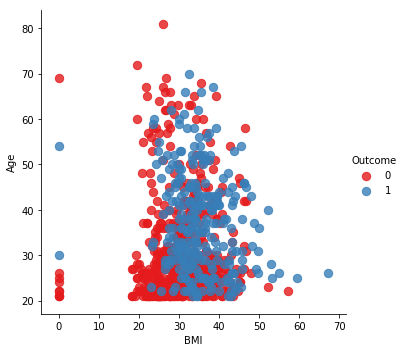

In [100]:
sns.lmplot("BMI","Age",data=datas,hue="Outcome",palette="Set1",fit_reg=False,scatter_kws={"s":70})

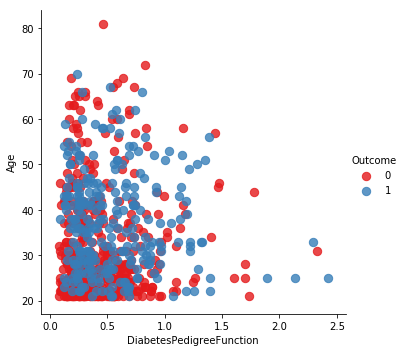

In [71]:
sns.lmplot("DiabetesPedigreeFunction","Age",data=datas,hue="Outcome",palette="Set1",fit_reg=False,scatter_kws={"s":70})

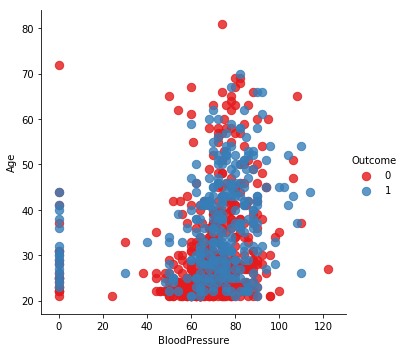

In [72]:
sns.lmplot("BloodPressure","Age",data=datas,hue="Outcome",palette="Set1",fit_reg=False,scatter_kws={"s":70})

In [73]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
#data wrangling
datas.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

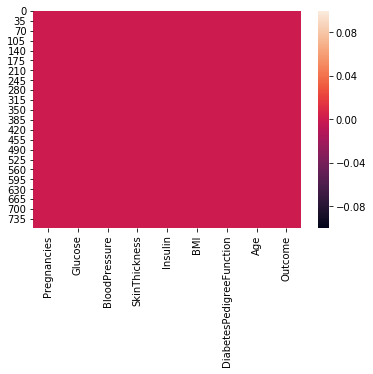

In [75]:
sns.heatmap(datas.isnull())

In [76]:
#training and testing
x_train=datas[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_train=datas["Outcome"]

In [77]:
data_test=pd.read_csv("test_set.csv")

In [78]:
X_test=data_test.drop("Outcome",axis=1)
Y_test=data_test["Outcome"]

In [79]:
from sklearn.linear_model import LogisticRegression


In [80]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)


/home/tony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
y_pred=logmodel.predict(X_test)

In [82]:
print(X_test.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [83]:
from sklearn.metrics import accuracy_score,log_loss

In [84]:
print("acuracy_score:",accuracy_score(Y_test,y_pred))

acuracy_score: 0.7532467532467533


In [85]:
print("LogLoss",log_loss(Y_test,y_pred))

LogLoss 8.522617520621873


In [86]:
#Train the algorithm
from sklearn.svm import SVC
svclassifier = SVC(kernel="linear")
svclassifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
#making prediction
y_pred = svclassifier.predict(X_test)

In [44]:
#model Evaluation
from sklearn.metrics import accuracy_score,log_loss
print("Accuracy_score :",accuracy_score(Y_test,y_pred))

Accuracy_score : 0.7662337662337663


In [46]:
print("LogLoss",log_loss(Y_test,y_pred))

LogLoss 8.07405159864342


In [54]:
from sklearn.neighbors import KNeighborsClassifier       
knn = KNeighborsClassifier(n_neighbors=3)               
knn.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
y_pred = knn.predict(X_test)                      
test_acc  = accuracy_score(Y_test, y_pred)
print("Test Accuracy: {}" .format(test_acc))

Test Accuracy: 0.8831168831168831


In [56]:
print("LogLoss",log_loss(Y_test,y_pred))

LogLoss 4.037030991512816
